In [1]:
import tensorflow as tf

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import pandas as pd
from math import *
from sklearn.metrics import *

data = pd.read_csv("C:\\Users\\mozzimerci\\jupyter notebook\\time\\bike_pm2.5\\SeoulBikeData (1).csv",encoding='CP949')

In [2]:
from graphviz import *
from sklearn.datasets import load_iris
from sklearn import tree
 
from collections import Counter
from itertools import chain, combinations
 
import ast
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import graphviz
import seaborn as sns
from sklearn import datasets, svm, metrics
from pandas import DataFrame

In [3]:
data

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
sum(data['Rented Bike Count']==0)

295

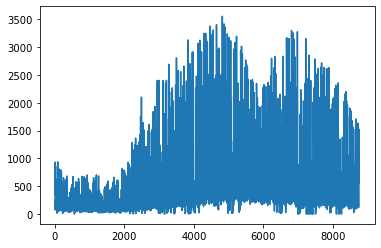

In [5]:
plt.plot(data['Rented Bike Count'])

In [6]:
data

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
data['Holiday']=data['Holiday'].factorize()[0]
data['Seasons']=data['Seasons'].factorize()[0]
data['Functioning Day']=data['Functioning Day'].factorize()[0]

In [8]:
cols=data.columns[1:-3]
cols=cols.drop(['Hour'])

In [9]:
cols

Index(['Rented Bike Count', 'Temperature', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [10]:
data

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,3,0,0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,3,0,0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,3,0,0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,3,0,0


In [11]:
#date_time = pd.to_datetime(data.pop('Date'), format='%d/%m/%Y')
#date_time

In [12]:
from sklearn.preprocessing import MinMaxScaler
values = data[cols].values.reshape(-1,9)
#scaled = values.astype('float32')
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled = (values-(np.min(values)))/(np.max(values)-(np.min(values)))
#scaled=scaler.fit_transform(values)

In [13]:
def fill_missing(values):
    one_day = 7 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if values[row,0]==0:
                values[row,0] = values[row - one_day,0]

In [14]:
values

array([[254. ,  -5.2,  37. , ...,   0. ,   0. ,   0. ],
       [204. ,  -5.5,  38. , ...,   0. ,   0. ,   0. ],
       [173. ,  -6. ,  39. , ...,   0. ,   0. ,   0. ],
       ...,
       [694. ,   2.6,  39. , ...,   0. ,   0. ,   0. ],
       [712. ,   2.1,  41. , ...,   0. ,   0. ,   0. ],
       [584. ,   1.9,  43. , ...,   0. ,   0. ,   0. ]])

In [15]:
values.shape

(8760, 9)

In [16]:
fill_missing(values)

In [17]:
scaled = (values-(np.min(values)))/(np.max(values)-(np.min(values)))

In [18]:
scaled 

array([[0.07935092, 0.00708192, 0.01884793, ..., 0.00853176, 0.00853176,
        0.00853176],
       [0.06541014, 0.00699827, 0.01912675, ..., 0.00853176, 0.00853176,
        0.00853176],
       [0.05676685, 0.00685886, 0.01940557, ..., 0.00853176, 0.00853176,
        0.00853176],
       ...,
       [0.20202978, 0.00925668, 0.01940557, ..., 0.00853176, 0.00853176,
        0.00853176],
       [0.20704846, 0.00911727, 0.0199632 , ..., 0.00853176, 0.00853176,
        0.00853176],
       [0.17136006, 0.00906151, 0.02052083, ..., 0.00853176, 0.00853176,
        0.00853176]])

In [19]:
x = scaled [:,1:]
y = scaled [:,0]

In [20]:
print(x.shape, y.shape)

(8760, 8) (8760,)


In [21]:
folds=[]
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=9)
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=9, test_size=None)


In [22]:
for train, val in tscv.split(x):
    folds.append((train, test))

In [23]:
for train, test in tscv.split(x):
    folds.append((train, test))
    print("TRAIN:", train, "TEST:", test)
    train_x, test_x = x[train], x[test]
    train_y, test_y = y[train], y[test]

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

## RMSE , MAE

In [24]:
depth_list = list(range(100))
del depth_list[0] 
rmse_list = []

# Validation
for depth in depth_list:
    regressor0 = tree.DecisionTreeRegressor(max_depth=depth, min_samples_split=5,
                                           splitter='best') 
    regressor0.fit(train_x, train_y)

    yhat = regressor0.predict(test_x)
    rmse = sqrt(mean_squared_error(test_y, yhat))
    rmse_list.append(rmse)
    
    result = list(map(list, zip(depth_list, rmse_list)))
    result_df = DataFrame(result,columns=['max_depth', 'rmse'])

print('-------TEST-------')
print(result_df)

-------TEST-------
    max_depth      rmse
0           1  0.153700
1           2  0.137509
2           3  0.131332
3           4  0.128428
4           5  0.124518
..        ...       ...
94         95  0.138790
95         96  0.140652
96         97  0.139742
97         98  0.137859
98         99  0.139933

[99 rows x 2 columns]


In [25]:
# Test
best_depth = result_df.iloc[result_df['rmse'].argmin()]['max_depth']
regressor0 = tree.DecisionTreeRegressor(max_depth=best_depth, min_samples_split=5, 
                                       splitter='best') 
regressor0.fit(train_x, train_y)
predict = regressor0.predict(test_x)
test_rmse = sqrt(mean_squared_error(test_y, predict))
predicted = regressor0.predict(test_x)
test_mae = mean_absolute_error(test_y, predicted)

print('best_depth :', best_depth)
print('Test RMSE :', test_rmse)
print('Test MAE :', test_mae)

best_depth : 6.0
Test RMSE : 0.12320525500598203
Test MAE : 0.08606678673917731


In [26]:
depth_list = list(range(100))
del depth_list[0] 
rmse_list = []

# Validation
for depth in depth_list:
    regressor1 = tree.DecisionTreeRegressor(max_depth=depth, min_samples_split=5,
                                           splitter='random') 
    regressor1.fit(train_x, train_y)

    yhat = regressor1.predict(test_x)
    rmse = sqrt(mean_squared_error(test_y, yhat))
    rmse_list.append(rmse)
    
    result = list(map(list, zip(depth_list, rmse_list)))
    result_df = DataFrame(result,columns=['max_depth', 'rmse'])

print('-------TEST-------')
print(result_df)

-------TEST-------
    max_depth      rmse
0           1  0.154577
1           2  0.135877
2           3  0.131494
3           4  0.149869
4           5  0.138879
..        ...       ...
94         95  0.141887
95         96  0.138707
96         97  0.141507
97         98  0.135112
98         99  0.144308

[99 rows x 2 columns]


In [27]:
# Test
best_depth = result_df.iloc[result_df['rmse'].argmin()]['max_depth']
regressor1 = tree.DecisionTreeRegressor(max_depth=best_depth, min_samples_split=5,
                                       splitter='random') 
regressor1.fit(train_x, train_y)
predict = regressor1.predict(test_x)
test_rmse = sqrt(mean_squared_error(test_y, predict))
predicted = regressor1.predict(test_x)
test_mae = mean_absolute_error(test_y, predicted)

print('best_depth :', best_depth)
print('Test RMSE :', test_rmse)
print('Test MAE :', test_mae)

best_depth : 9.0
Test RMSE : 0.12843856357667588
Test MAE : 0.08978136667800275


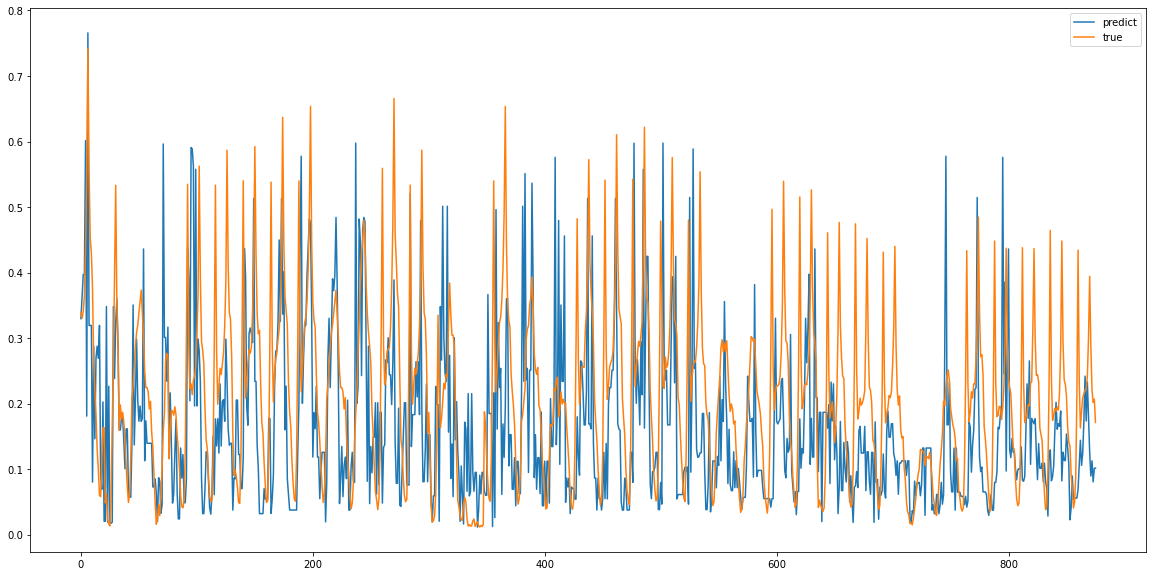

In [28]:
from sklearn.metrics import *

from matplotlib import pyplot
y_hat = regressor1.predict(test_x)
y_hat = yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(y_hat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()

## GridSearchCV

In [29]:
regressor2 = tree.DecisionTreeRegressor(max_depth=8, min_samples_split=5, 
                                       splitter='best', max_leaf_nodes=10)

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10],
              'min_samples_leaf': [10,20,40,100],
              'min_samples_split':[10,20,30,50,100],
              'splitter':['best', 'random']
}

In [32]:
grid_search = GridSearchCV(regressor2, parameters, cv=5,
                           scoring = 'neg_mean_absolute_error')

grid_search.fit(train_x, train_y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=8, max_leaf_nodes=10,
                                             min_samples_split=5),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [10, 20, 40, 100],
                         'min_samples_split': [10, 20, 30, 50, 100],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error')

In [33]:
grid_search.best_params_ 

{'max_depth': 6,
 'min_samples_leaf': 40,
 'min_samples_split': 10,
 'splitter': 'best'}

In [34]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=10, min_samples_leaf=40,
                      min_samples_split=10)

In [35]:
best_model = grid_search.best_estimator_

In [36]:
best_model = grid_search.best_estimator_
best_model.fit(train_x, train_y)
predict = best_model.predict(test_x)
test_rmse = sqrt(mean_squared_error(test_y, predict))
predicted = best_model.predict(test_x)
test_mae = mean_absolute_error(test_y, predicted)

print('Best parameters :', grid_search.best_params_)
print('Test RMSE :', test_rmse)
print('Test MAE :', test_mae)

Best parameters : {'max_depth': 6, 'min_samples_leaf': 40, 'min_samples_split': 10, 'splitter': 'best'}
Test RMSE : 0.1365851304540772
Test MAE : 0.1024378959578742


## Graph

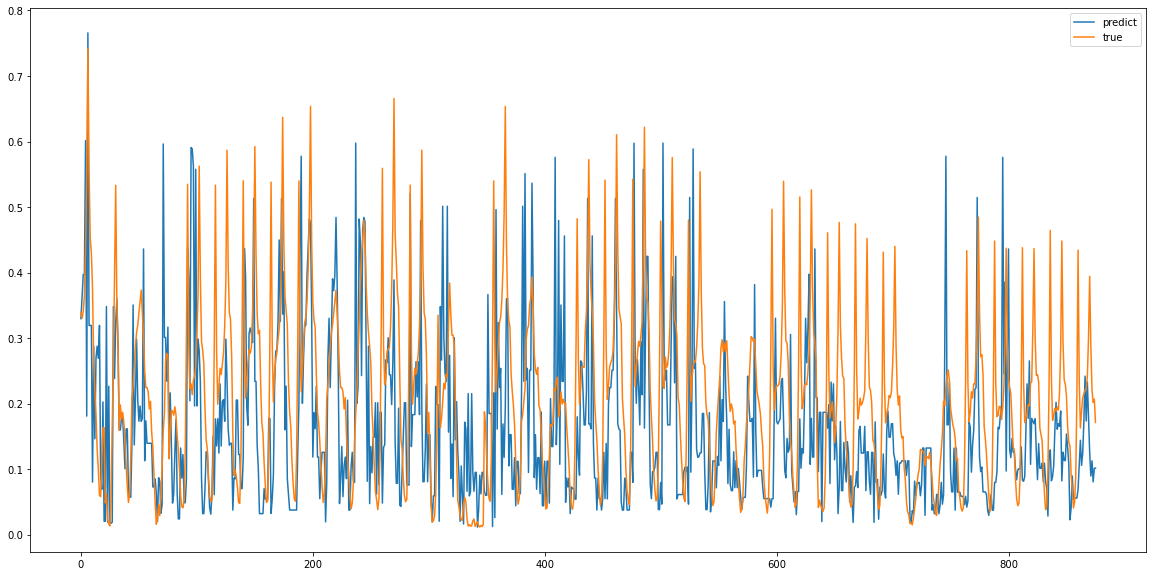

In [37]:
from sklearn.metrics import *

from matplotlib import pyplot
y_hat = best_model.predict(test_x)
y_hat = yhat.reshape(-1,1)
plt.figure(figsize=(20,10))

pyplot.plot(y_hat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()